In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("max_column",151)

In [18]:
df_accepted = pd.read_csv(r"D:\project\Lending Club\accepted_2007_to_2018Q4.csv\accepted_2007_to_2018Q4.csv")
df_rejected = pd.read_csv(r"D:\project\Lending Club\rejected_2007_to_2018Q4.csv\rejected_2007_to_2018Q4.csv")

C:\Users\Debas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
print(df_accepted.shape)
df_accepted.head()

(2260701, 151)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
print(df_rejected.shape)
df_rejected.head()

(27648741, 9)


,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [19]:
df_rejected['Debt-To-Income Ratio']= df_rejected['Debt-To-Income Ratio'].str.rstrip('%')

In [ ]:
df_rejected.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43,209xx,MD,< 1 year,0.0


In [20]:
df_acpt_new = df_accepted[['loan_amnt','dti','title','zip_code','addr_state','fico_range_high','emp_length']]
df_acpt_new

,loan_amnt,dti,title,zip_code,addr_state,fico_range_high,emp_length
0,3600.0,5.91,Debt consolidation,190xx,PA,679.0,10+ years
1,24700.0,16.06,Business,577xx,SD,719.0,10+ years
2,20000.0,10.78,NaN,605xx,IL,699.0,10+ years
3,35000.0,17.06,Debt consolidation,076xx,NJ,789.0,10+ years
4,10400.0,25.37,Major purchase,174xx,PA,699.0,3 years
...,...,...,...,...,...,...,...
2260696,40000.0,12.75,NaN,907xx,CA,709.0,9 years
2260697,24000.0,18.30,Debt consolidation,334xx,FL,664.0,6 years
2260698,14000.0,23.36,NaN,770xx,TX,664.0,10+ years
2260699,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
columns=['Loan_Amount','Debt_To_Income_Ratio','Purpose','Zip_Code','State','Risk_Score','Employment_Length']
df_acpt_new.columns=columns

In [22]:
df_acpt_new['Loan_status'] = 1

C:\Users\Debas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df_acpt_new.shape

(2260701, 8)

In [ ]:
df_rej_new = df_rejected.drop(['Application Date','Policy Code'],axis=1)
df_rej_new

,Amount Requested,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length
0,1000.0,Wedding Covered but No Honeymoon,693.0,10,481xx,NM,4 years
1,1000.0,Consolidating Debt,703.0,10,010xx,MA,< 1 year
2,11000.0,Want to consolidate my debt,715.0,10,212xx,MD,1 year
3,6000.0,waksman,698.0,38.64,017xx,MA,< 1 year
4,1500.0,mdrigo,509.0,9.43,209xx,MD,< 1 year
...,...,...,...,...,...,...,...
27648736,10000.0,Debt consolidation,590.0,41.26,441xx,OH,< 1 year
27648737,10000.0,moving,NaN,1.48,207xx,MD,5 years
27648738,1200.0,Other,686.0,10.26,914xx,CA,< 1 year
27648739,25000.0,debt_consolidation,NaN,17.71,880xx,NM,< 1 year


In [24]:
columns=['Loan_Amount','Purpose','Risk_Score','Debt_To_Income_Ratio','Zip_Code','State','Employment_Length']
df_rej_new.columns=columns

NameError: name 'df_rej_new' is not defined

In [ ]:
df_rej_new['Loan_status'] = 0

In [ ]:
df_rej_new.shape

In [ ]:
df_loan = pd.concat([df_acpt_new, df_rej_new])

In [ ]:
df_loan.shape

In [ ]:
#df_loan.to_csv("Loan_Approval.csv",index=False)

In [7]:
df_loan = pd.read_csv("Loan_Approval.csv")

In [8]:
df_loan.head()

,Debt_To_Income_Ratio,Employment_Length,Loan_Amount,Loan_status,Purpose,Risk_Score,State,Zip_Code
0,5.91,10+ years,3600.0,1,Debt consolidation,679.0,PA,190xx
1,16.06,10+ years,24700.0,1,Business,719.0,SD,577xx
2,10.78,10+ years,20000.0,1,NaN,699.0,IL,605xx
3,17.06,10+ years,35000.0,1,Debt consolidation,789.0,NJ,076xx
4,25.37,3 years,10400.0,1,Major purchase,699.0,PA,174xx


In [9]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29909442 entries, 0 to 29909441
Data columns (total 8 columns):
Debt_To_Income_Ratio    float64
Employment_Length       object
Loan_Amount             float64
Loan_status             int64
Purpose                 object
Risk_Score              float64
State                   object
Zip_Code                object
dtypes: float64(3), int64(1), object(4)
memory usage: 1.8+ GB


In [10]:
df_loan.isnull().sum()

Debt_To_Income_Ratio        1744
Employment_Length        1098295
Loan_Amount                   33
Loan_status                    0
Purpose                    24661
Risk_Score              18497663
State                         55
Zip_Code                     327
dtype: int64

In [11]:
df_loan.dropna(inplace=True)
df_loan.isnull().sum()

Debt_To_Income_Ratio    0
Employment_Length       0
Loan_Amount             0
Loan_status             0
Purpose                 0
Risk_Score              0
State                   0
Zip_Code                0
dtype: int64

In [12]:
df_loan.drop(['State','Zip_Code'],axis=1,inplace=True)

In [13]:
df_loan.Employment_Length.unique()

array(['10+ years', '3 years', '4 years', '6 years', '1 year', '7 years',
       '8 years', '5 years', '2 years', '9 years', '< 1 year'],
      dtype=object)

In [14]:
df_loan['Employment_Length'] = df_loan['Employment_Length'].str.replace(r'\D', '').astype(int)

In [15]:
df_loan.Purpose.nunique()

118355

In [16]:
df_loan.drop('Purpose',inplace=True,axis=1)

In [13]:
df_loan.head()

,Debt_To_Income_Ratio,Employment_Length,Loan_Amount,Loan_status,Risk_Score
0,5.91,10,3600.0,1,679.0
1,16.06,10,24700.0,1,719.0
3,17.06,10,35000.0,1,789.0
4,25.37,3,10400.0,1,699.0
5,10.20,4,11950.0,1,694.0


In [14]:
df_loan.shape

(11086103, 5)

In [15]:
df_loan.describe()

,Debt_To_Income_Ratio,Employment_Length,Loan_Amount,Loan_status,Risk_Score
count,1.108610e+07,1.108610e+07,1.108610e+07,1.108610e+07,1.108610e+07
mean,1.410551e+02,2.299447e+00,1.312834e+04,1.888434e-01,6.415382e+02
std,1.600261e+04,2.804890e+00,1.065575e+04,3.913842e-01,8.733528e+01
min,-1.000000e+00,1.000000e+00,1.500000e+02,0.000000e+00,0.000000e+00
25%,9.880000e+00,1.000000e+00,5.000000e+03,0.000000e+00,6.030000e+02
50%,1.965000e+01,1.000000e+00,1.000000e+04,0.000000e+00,6.530000e+02
75%,3.283000e+01,1.000000e+00,2.000000e+04,0.000000e+00,6.890000e+02
max,5.000003e+07,1.000000e+01,1.400000e+06,1.000000e+00,9.900000e+02


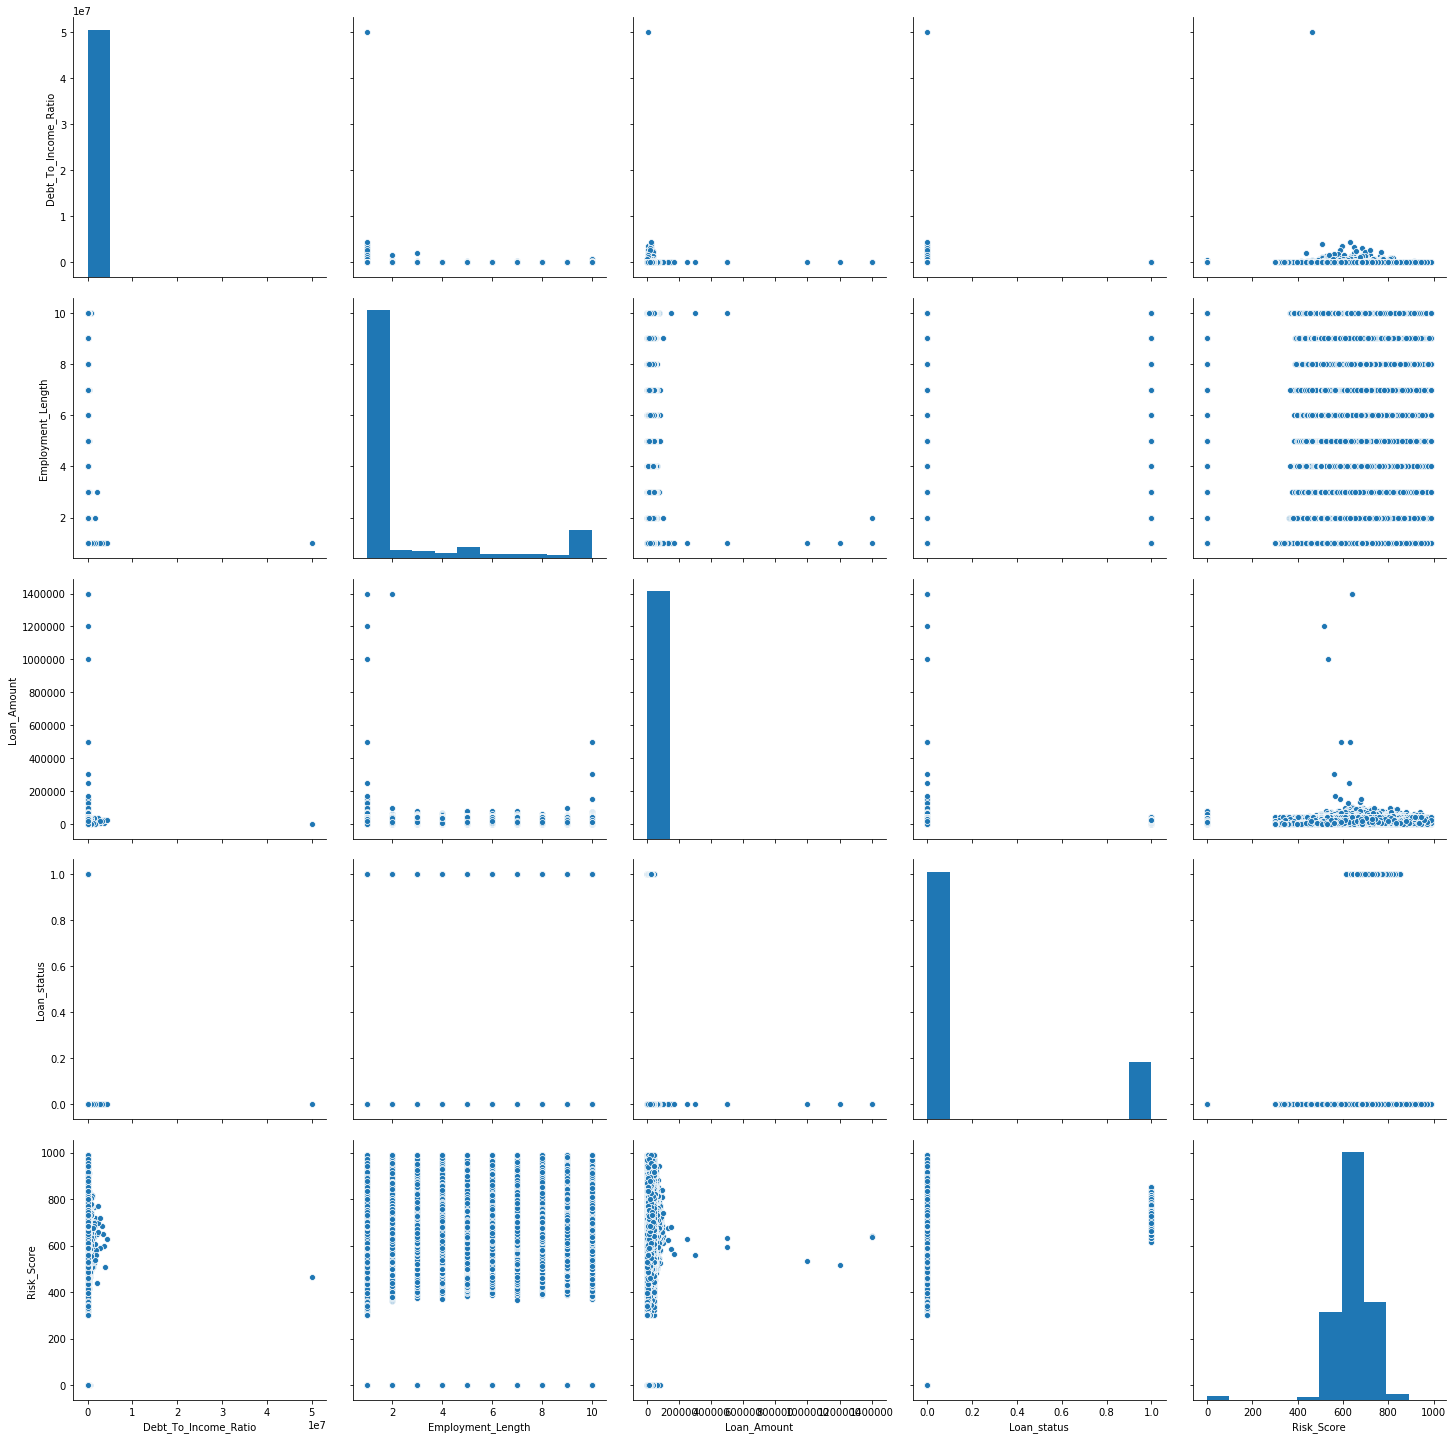

In [17]:
sns.pairplot(df_loan,height=4)
plt.show()

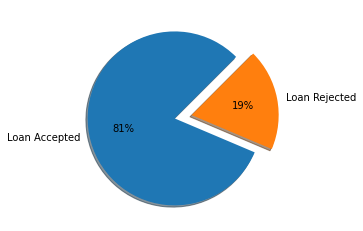

In [16]:
labels=['Loan Accepted','Loan Rejected']
plt.pie(df_loan.Loan_status.value_counts(),explode=[0.2,0],shadow=True,startangle=45,labels=labels,autopct='%1.0f%%')
plt.show()

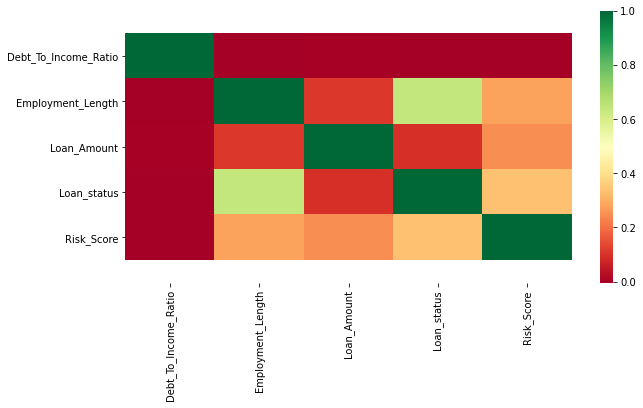

In [17]:
plt.figure(figsize=(10,5))
ax = sns.heatmap(df_loan.corr(),cmap='RdYlGn')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [18]:
X = df_loan.drop('Loan_status',axis=1)
y = df_loan.Loan_status

In [19]:
from sklearn.metrics import classification_report,accuracy_score

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=55)

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight="balanced")
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
print('Accuracy Score:',accuracy_score(y_test,y_pred)*100,'%')

Accuracy Score: 86.37979705225595 %


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91   1797821
           1       0.60      0.83      0.70    419400

    accuracy                           0.86   2217221
   macro avg       0.78      0.85      0.80   2217221
weighted avg       0.89      0.86      0.87   2217221



## Knn Classifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
y_train_pred_2 = knn.predict(X_train)
y_pred_2 = knn.predict(X_test)

In [37]:
print("Train Accuracy :",accuracy_score(y_train,y_train_pred_2))
print("Test Accuracy :",accuracy_score(y_test,y_pred_2))

Train Accuracy : 0.9762043287981507
Test Accuracy : 0.9680591154422585


In [34]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98   1797821
           1       0.90      0.94      0.92    419400

    accuracy                           0.97   2217221
   macro avg       0.94      0.96      0.95   2217221
weighted avg       0.97      0.97      0.97   2217221



## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
X = df_loan.drop('Loan_status',axis=1)
y = df_loan.Loan_status

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [23]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
y_train_pred_3 = rfc.predict(X_train)
y_pred_3 = rfc.predict(X_test)

In [25]:
print("Train Accuracy :",accuracy_score(y_train,y_train_pred_3))
print("Test Accuracy :",accuracy_score(y_test,y_pred_3))

Train Accuracy : 0.9958383706086066
Test Accuracy : 0.9584353566920032


In [26]:
print(classification_report(y_test,y_pred_3))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97   1798592
           1       0.88      0.90      0.89    418629

    accuracy                           0.96   2217221
   macro avg       0.93      0.94      0.93   2217221
weighted avg       0.96      0.96      0.96   2217221



## Gradient Boosting Classifier

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

In [28]:
rs_gbt = GradientBoostingClassifier()
rs_gbt.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [29]:
y_pred_4 = rs_gbt.predict(X_test)
y_pred4_train = rs_gbt.predict(X_train)

In [30]:
print("Train Accuracy :",accuracy_score(y_train,y_pred4_train))
print("Test Accuracy :",accuracy_score(y_test,y_pred_4))

Train Accuracy : 0.9413565317477446
Test Accuracy : 0.9411714033017007


In [31]:
print(classification_report(y_test,y_pred_4))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96   1798592
           1       0.85      0.83      0.84    418629

    accuracy                           0.94   2217221
   macro avg       0.91      0.90      0.90   2217221
weighted avg       0.94      0.94      0.94   2217221

